# Random forest

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


df = pd.read_csv('../Data/Heart.csv', index_col=0)
df.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303 entries, 1 to 303
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        303 non-null    int64  
 1   Sex        303 non-null    int64  
 2   ChestPain  303 non-null    object 
 3   RestBP     303 non-null    int64  
 4   Chol       303 non-null    int64  
 5   Fbs        303 non-null    int64  
 6   RestECG    303 non-null    int64  
 7   MaxHR      303 non-null    int64  
 8   ExAng      303 non-null    int64  
 9   Oldpeak    303 non-null    float64
 10  Slope      303 non-null    int64  
 11  Ca         299 non-null    float64
 12  Thal       301 non-null    object 
 13  AHD        303 non-null    object 
dtypes: float64(2), int64(9), object(3)
memory usage: 35.5+ KB


In [3]:
df.dropna(inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 1 to 302
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        297 non-null    int64  
 1   Sex        297 non-null    int64  
 2   ChestPain  297 non-null    object 
 3   RestBP     297 non-null    int64  
 4   Chol       297 non-null    int64  
 5   Fbs        297 non-null    int64  
 6   RestECG    297 non-null    int64  
 7   MaxHR      297 non-null    int64  
 8   ExAng      297 non-null    int64  
 9   Oldpeak    297 non-null    float64
 10  Slope      297 non-null    int64  
 11  Ca         297 non-null    float64
 12  Thal       297 non-null    object 
 13  AHD        297 non-null    object 
dtypes: float64(2), int64(9), object(3)
memory usage: 34.8+ KB


<Axes: xlabel='AHD', ylabel='count'>

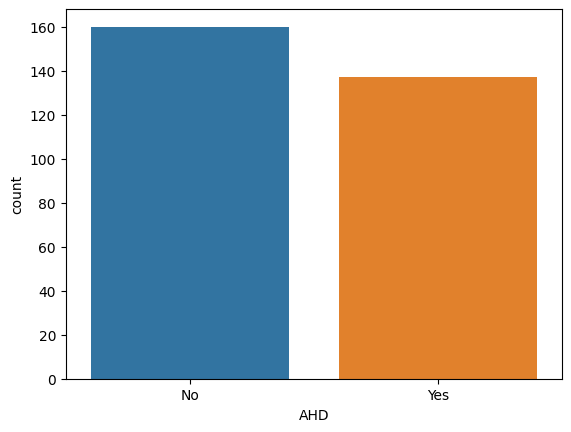

In [5]:
sns.countplot(x='AHD', data=df)

In [6]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,ChestPain_nonanginal,ChestPain_nontypical,ChestPain_typical,Thal_normal,Thal_reversable,AHD_Yes
1,63,1,145,233,1,2,150,0,2.3,3,0.0,0,0,1,0,0,0
2,67,1,160,286,0,2,108,1,1.5,2,3.0,0,0,0,1,0,1
3,67,1,120,229,0,2,129,1,2.6,2,2.0,0,0,0,0,1,1
4,37,1,130,250,0,0,187,0,3.5,3,0.0,1,0,0,1,0,0
5,41,0,130,204,0,2,172,0,1.4,1,0.0,0,1,0,1,0,0


In [7]:
from sklearn.model_selection import train_test_split
from utils import print_shapes
X, y = df.drop("AHD_Yes", axis=1), df["AHD_Yes"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [8]:
print_shapes(X_train, X_test, y_train, y_test) # Shape is correct.

X_train shape: (198, 16)
X_test shape: (99, 16)
y_train shape: (198,)
y_test shape: (99,)



## Random forest

In [9]:
from sklearn.ensemble import RandomForestClassifier # Classifier because we have and want a binary outcome.

model = RandomForestClassifier(random_state= 42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

y_pred

array([0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=uint8)

### Hyperparameter tuning

In [10]:
from sklearn.model_selection import GridSearchCV

# course tuning
param_grid = {"n_estimators":[10, 100, 150, 1000], "max_depth":[5, 10, 15, 20, None]} # n_estimators is the number of trees in the forest. max_depth is the maximum depth of the tree.
# for more refined tuning repeat the process using parameters closer to the best parameters found in the coarse search/tuning.

clf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid= param_grid, cv=5, scoring="recall", verbose=1)
clf

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [5, 10, 15, 20, None],
                         'n_estimators': [10, 100, 150, 1000]},
             scoring='recall', verbose=1)

For scoring we can choose between these two. We want recall

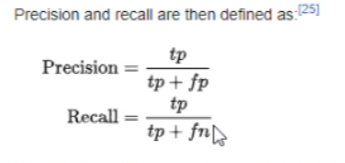

In [11]:
clf.fit(X_train, y_train) # Fitting 5 folds = 5 models, 20 candidates = 20 models, 5*20 = 100 models.

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [5, 10, 15, 20, None],
                         'n_estimators': [10, 100, 150, 1000]},
             scoring='recall', verbose=1)

In [12]:
clf.best_params_

{'max_depth': 10, 'n_estimators': 1000}

## Evaluation

              precision    recall  f1-score   support

           0       0.82      0.87      0.84        53
           1       0.84      0.78      0.81        46

    accuracy                           0.83        99
   macro avg       0.83      0.83      0.83        99
weighted avg       0.83      0.83      0.83        99



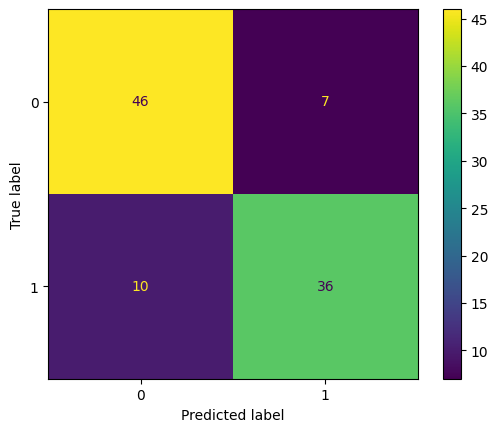

In [13]:
from utils import evaluate_classification
y_pred = clf.predict(X_test)

evaluate_classification(y_test, y_pred)

## Feature importance

Note: todo feature importance it's better to use one-hot enconding to note loose information on the dropped column  
This is left for the reader to do

In [16]:
model.feature_importances_

array([0.0931407 , 0.03372479, 0.07013429, 0.0792663 , 0.00730311,
       0.02068672, 0.1240207 , 0.04023465, 0.10045081, 0.02231842,
       0.17844666, 0.04327672, 0.00937807, 0.01567818, 0.09106361,
       0.07087628])

In [20]:
model.feature_importances_.sum(), model.feature_importances_.__len__()

(1.0, 16)

In [23]:
feature_importances = pd.DataFrame([X.columns, model.feature_importances_]).T
feature_importances.columns = ["Feature", "Importance"]
feature_importances.sort_values(by="Importance", ascending=False, inplace=True)
feature_importances

,Feature,Importance
10,Ca,0.178447
6,MaxHR,0.124021
8,Oldpeak,0.100451
0,Age,0.093141
14,Thal_normal,0.091064
3,Chol,0.079266
15,Thal_reversable,0.070876
2,RestBP,0.070134
11,ChestPain_nonanginal,0.043277
7,ExAng,0.040235


<Axes: xlabel='Importance', ylabel='Feature'>

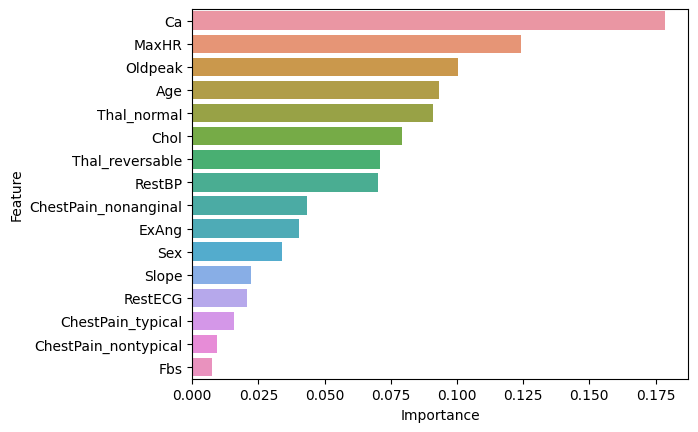

In [25]:
# Plot feature importances
sns.barplot(y="Feature", x="Importance", data=feature_importances)